In [11]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
import pandas as pd 
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import keras

## Dataset

Importamos el dataset de sklearn

In [2]:
digits = datasets.load_digits()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [4]:
digits.data.shape, digits.images.shape

((1797, 64), (1797, 8, 8))

In [5]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

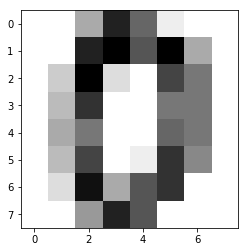

In [7]:
plt.imshow(digits.images[0], cmap='binary')

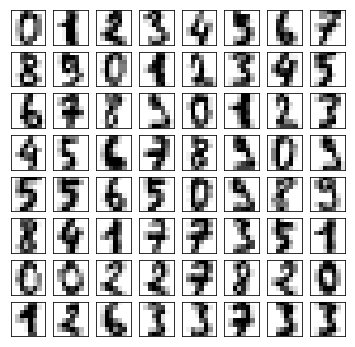

In [14]:
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [8]:
test_idx = np.random.choice(range(digits.images.shape[0]), int(digits.images.shape[0] * 0.1), replace=False)
train_idx = [i for i in range(digits.images.shape[0]) if i not in test_idx]
X_train = digits.images[train_idx][:, :, :, None]
y_train = pd.get_dummies(digits.target[train_idx])
X_test = digits.images[test_idx][:, :, :, None]
y_test = pd.get_dummies(digits.target[test_idx])


## Deep Neural Networks - Convolutional Neural Networks 

Un red neuronal "profunda" es aquella que tiene múltiples representaciones latentes que buscan extraer variables explicativas de bajo nivel y componerlas en capas superiores. Las redes convolucionales son un tipo de estas redes profundas, puntualmente utiles para la clasificacion de imagenes. 

###  Convolutional Neural Networks 

<br>

![](http://www.mdpi.com/information/information-07-00061/article_deploy/html/images/information-07-00061-g001.png)

<br>

**A. Convolutional layer: ** Esta capa utiliza un filtro convolutivo para procesar partes de la imagen, el filtro consiste de coeficiente que se aplican sucesivamente a pedasos de la imagen.

**B. Tranco (stride): ** El tranco es la cantidad de pixeles que se saltean cada vez qeu se mueve el filtro.

![](http://deeplearning.net/software/theano/_images/numerical_padding_strides.gif) 

**C. Pooling Layer:**  Esta capa se utiliza para filtrar variables menos importantes y disminuir la cantidad necesaria de parámetros totales. 

![](https://upload.wikimedia.org/wikipedia/commons/e/e9/Max_pooling.png)



In [62]:
y_train

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,1
9,1,0,0,0,0,0,0,0,0,0


In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(np.unique(digits.target).shape[0], activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,  optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 6, 6, 32)          320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 64)          18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

### 5.5 Train the Model

In [13]:
model.fit(X_train, y_train, batch_size=32, epochs=3, verbose=1, validation_data=(X_test, y_test))

Train on 1618 samples, validate on 179 samples
Epoch 1/3
1618/1618 [==============================] - 2s 1ms/step - loss: 1.8782 - acc: 0.3362 - val_loss: 1.0430 - val_acc: 0.7263
Epoch 2/3
1618/1618 [==============================] - 0s 138us/step - loss: 1.0067 - acc: 0.6687 - val_loss: 0.4791 - val_acc: 0.8827
Epoch 3/3
1618/1618 [==============================] - 0s 132us/step - loss: 0.6745 - acc: 0.7738 - val_loss: 0.3295 - val_acc: 0.8827


In [14]:
model.predict(X_test)

array([[8.5211834e-03, 3.3770062e-02, 6.5297037e-02, ..., 4.9331626e-03,
        2.5445264e-02, 1.2329294e-01],
       [8.5493841e-05, 2.0233477e-03, 9.8014029e-04, ..., 5.0729177e-05,
        2.0845537e-03, 9.6075571e-01],
       [6.3381135e-04, 3.2089326e-01, 9.8073091e-03, ..., 1.4959987e-03,
        4.2577170e-02, 5.8964723e-01],
       ...,
       [1.9116425e-03, 7.2195196e-01, 7.8645900e-02, ..., 3.0359177e-02,
        1.3797876e-01, 9.6084522e-03],
       [2.0534058e-04, 4.8835127e-04, 4.7364393e-03, ..., 6.3996745e-04,
        6.1649806e-04, 4.3955054e-02],
       [4.2389980e-05, 4.6925863e-05, 4.8805137e-05, ..., 9.9928814e-01,
        4.2884512e-05, 2.8467975e-05]], dtype=float32)

In [15]:
preds = model.predict(X_test).argmax(axis=1)
pd.crosstab(y_test.idxmax(axis=1), preds)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,20,0,0,0,0,0,0,0,0,0
1,0,14,0,0,1,0,1,0,0,2
2,0,0,14,0,0,0,0,0,0,0
3,0,0,1,14,0,1,0,0,0,1
4,0,0,0,0,21,0,3,0,0,1
5,0,0,0,0,0,16,0,0,0,0
6,0,0,0,0,0,0,20,0,0,0
7,0,0,0,0,2,1,0,8,0,0
8,0,2,0,0,0,0,0,0,5,5
